## Data Import

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
df = pd.read_csv("C:/Users/MRE/Desktop/Data Engineering/Final/fifa_eda_stats.csv")
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,Right,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,€420K,Right,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,Right,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,€380K,Right,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,Slovenia,90,93,Atlético Madrid,€68M,€94K,Right,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


# Data Wrangling

## Missing Value Analysis & Filling Missing Values

In [22]:
df.isnull().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                          241
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys                        48
Dribbling                      48
Curve                          48
FKAccuracy    

I'm going to dropped **Loaned From**, **Joined features** from dataset. There is no specific impact while calculating Wage.

In [23]:
df.drop('Loaned From', axis=1, inplace=True)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallContro

In [24]:
df.drop('Joined', axis=1, inplace=True)
df.isnull().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Position                      60
Jersey Number                 60
Contract Valid Until         289
Height                        48
Weight                        48
Crossing                      48
Finishing                     48
HeadingAccuracy               48
ShortPassing                  48
Volleys                       48
Dribbling                     48
Curve                         48
FKAccuracy                    48
LongPassing                   48
BallControl                   48
Accelerati

In [25]:
for column in df.columns:
    if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == object:
        df[column].fillna(df[column].mode()[0], inplace=True)
    
df.isnull().sum()

C:\Users\MRE\AppData\Local\Temp/ipykernel_1476/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_1476/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_1476/3315503910.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number or df[column].dtype == float or df[column].dtype == int:
C:\Users\MRE\AppData\Local\Temp/ipykernel_1476/3315503910.py:2: DeprecationWarning

ID                          0
Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Jersey Number               0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

<h2>Outlier Detection</h2>

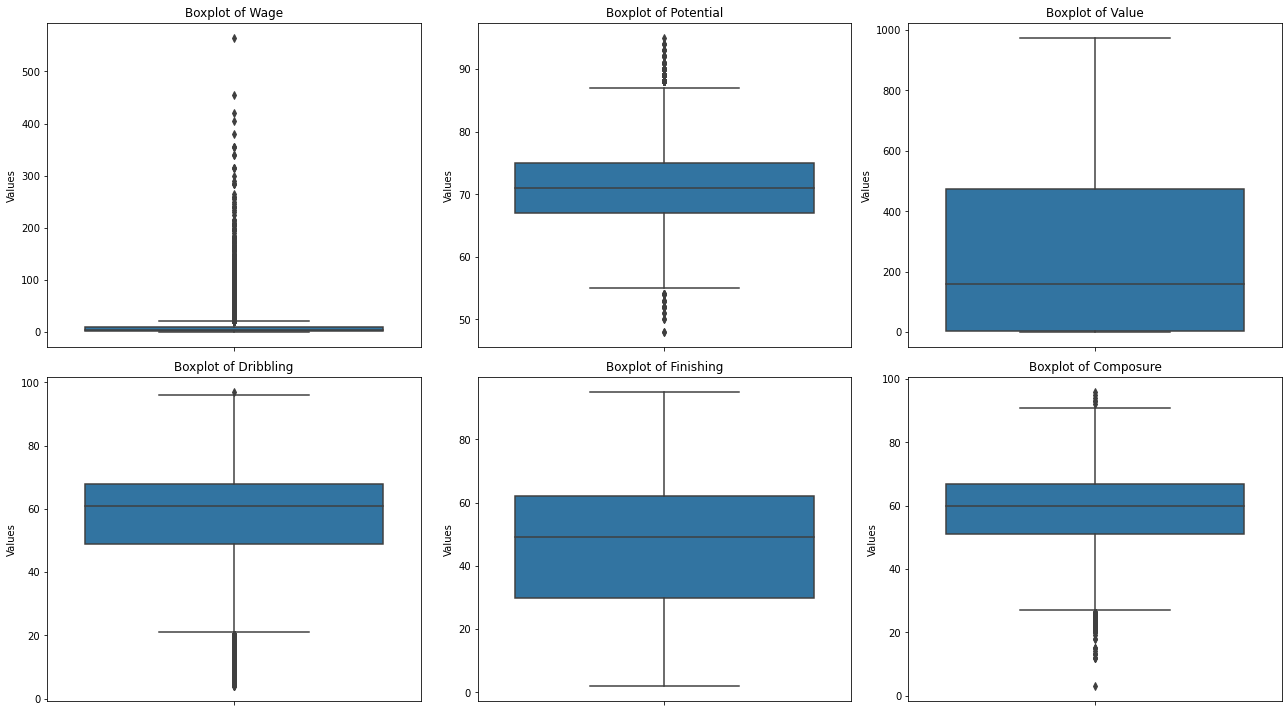

In [26]:
# Features that to be checked
features_to_check = ['Wage', 'Potential', 'Value', 'Dribbling', 'Finishing', 'Composure']

# Wage, Value cleaning & convert
df['Wage'] = df['Wage'].replace('[\€,K,M]', '', regex=True).astype(float)
df['Value'] = df['Value'].replace('[\€,M,K]', '', regex=True).astype(float)

#Boxplot Visualization
plt.figure(figsize=(18, 10))
for i, feature in enumerate(features_to_check, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [27]:
# Outlier Detection via Z-Score
z_scores = np.abs(stats.zscore(df[features_to_check]))
filtered_entries = (z_scores < 3).all(axis=1)
filtered_entries

0        False
1        False
2        False
3        False
4        False
         ...  
18202     True
18203     True
18204     True
18205     True
18206     True
Length: 18207, dtype: bool

In [28]:
df = df[filtered_entries]

## Standartization & Normalization

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

for col in numeric_cols:
    # Normalization
    df[col+'_normalized'] = min_max_scaler.fit_transform(df[[col]])
    # Standardizationb
    df[col+'_standardized'] = standard_scaler.fit_transform(df[[col]])
    
df.head(10)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKDiving_normalized,GKDiving_standardized,GKHandling_normalized,GKHandling_standardized,GKKicking_normalized,GKKicking_standardized,GKPositioning_normalized,GKPositioning_standardized,GKReflexes_normalized,GKReflexes_standardized
76,41,Iniesta,34,Spain,86,86,Vissel Kobe,21.5,21.0,Right,...,0.058140,-0.597455,0.144578,-0.190156,0.059524,-0.617777,0.141176,-0.188766,0.068966,-0.537264
90,189513,Parejo,29,Spain,85,85,Valencia CF,37.0,66.0,Right,...,0.046512,-0.655110,0.096386,-0.431357,0.130952,-0.247303,0.152941,-0.128927,0.080460,-0.480440
94,184267,Y. Brahimi,28,Algeria,85,85,FC Porto,39.0,28.0,Right,...,0.139535,-0.193872,0.180723,-0.009255,0.130952,-0.247303,0.070588,-0.547803,0.068966,-0.537264
102,171919,Naldo,35,Brazil,85,85,FC Schalke 04,9.0,38.0,Right,...,0.151163,-0.136217,0.108434,-0.371056,0.154762,-0.123811,0.082353,-0.487963,0.149425,-0.139496
108,120533,Pepe,35,Portugal,85,85,Beşiktaş JK,9.0,57.0,Right,...,0.081395,-0.482146,0.168675,-0.069555,0.047619,-0.679523,0.094118,-0.428124,0.103448,-0.366792
109,41236,Z. Ibrahimović,36,Sweden,85,85,LA Galaxy,14.0,15.0,Right,...,0.139535,-0.193872,0.168675,-0.069555,0.107143,-0.370794,0.094118,-0.428124,0.126437,-0.253144
111,216460,J. Giménez,23,Uruguay,84,88,Atlético Madrid,34.0,63.0,Right,...,0.093023,-0.424491,0.120482,-0.310756,0.071429,-0.556032,0.105882,-0.368284,0.160920,-0.082672
112,212462,Alex Telles,25,Brazil,84,87,FC Porto,32.0,22.0,Left,...,0.139535,-0.193872,0.084337,-0.491657,0.130952,-0.247303,0.117647,-0.308445,0.149425,-0.139496
114,212198,Bruno Fernandes,23,Portugal,84,88,Sporting CP,40.5,22.0,Right,...,0.127907,-0.251527,0.156627,-0.129855,0.166667,-0.062065,0.082353,-0.487963,0.149425,-0.139496
120,207566,William Carvalho,26,Portugal,84,86,Real Betis,31.5,38.0,Right,...,0.058140,-0.597455,0.060241,-0.612257,0.047619,-0.679523,0.152941,-0.128927,0.149425,-0.139496


In [30]:
df.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot',
       ...
       'GKDiving_normalized', 'GKDiving_standardized', 'GKHandling_normalized',
       'GKHandling_standardized', 'GKKicking_normalized',
       'GKKicking_standardized', 'GKPositioning_normalized',
       'GKPositioning_standardized', 'GKReflexes_normalized',
       'GKReflexes_standardized'],
      dtype='object', length=143)

In [31]:
df.dtypes

ID                              int64
Name                           object
Age                             int64
Nationality                    object
Overall                         int64
                               ...   
GKKicking_standardized        float64
GKPositioning_normalized      float64
GKPositioning_standardized    float64
GKReflexes_normalized         float64
GKReflexes_standardized       float64
Length: 143, dtype: object

### ER-Diagram

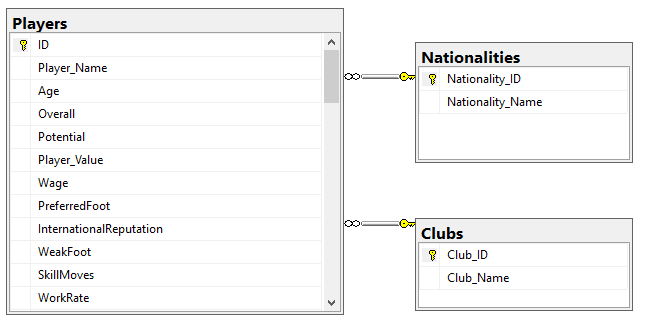

# Trends/Myths/Observations

<a href="#reputation">**Players with higher international reputation usually have higher salaries:** Players who are famous worldwide often get paid more because they bring marketing value to their clubs.</a>

<a href="#potential">**Young players with high potential scores tend to have higher market values:** Young players with high potential are likely to become big stars in the future, increasing their market value.</a>

<a href="#market_value">**Forwards usually have higher market values than players in other positions:** Strikers or forwards who can score goals directly affect the outcomes of games, so they often have high market values.</a>

<a href="#dribbling_and_finishing">**Players with better dribbling and finishing skills have higher values:** Players with good technical skills can make a big difference in games, which increases their market values.</a>

<a href="#composure">**Players with higher composure scores usually have higher salaries:** Composure shows how well players perform under pressure. Players with high composure are valuable because they can handle stressful situations in important games.</a>



<p id="reputation">Players with higher international reputation usually have higher salaries</p>

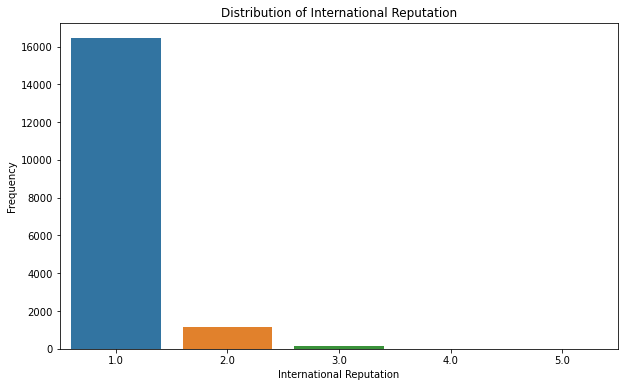

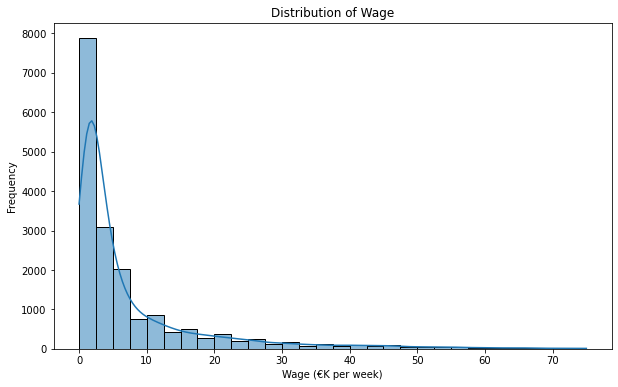

In [32]:
# International Reputation distributon graph
plt.figure(figsize=(10, 6))
sns.countplot(x='International Reputation', data=df)
plt.title('Distribution of International Reputation')
plt.xlabel('International Reputation')
plt.ylabel('Frequency')
plt.show()

# Wage distributon graph
plt.figure(figsize=(10, 6))
sns.histplot(df['Wage'], bins=30, kde=True)
plt.title('Distribution of Wage')
plt.xlabel('Wage (€K per week)')
plt.ylabel('Frequency')
plt.show()

Uluslararası Reputasyon ile Wage arasındaki Korelasyon Katsayısı: 0.5073266169502627


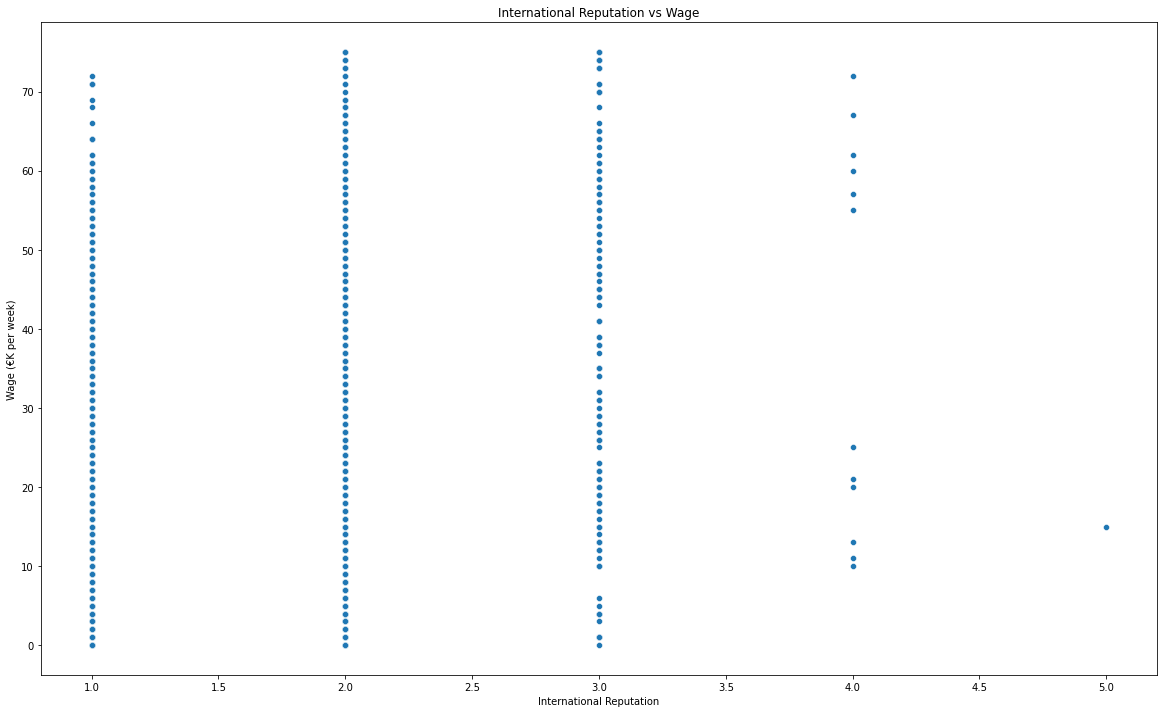

In [33]:
# Clearing & Transforming Wage Column
df['Wage'] = df['Wage'].replace('[\€,K]', '', regex=True).astype(float)  # K euro cinsinden varsayıyorum

# Calculation of Correlation between International Reputation and Wage
correlation = df['International Reputation'].corr(df['Wage'])
print("Correlation Coefficient: ", correlation)

# Visual
plt.figure(figsize=(20, 12))
sns.scatterplot(x='International Reputation', y='Wage', data=df)
plt.title('International Reputation vs Wage')
plt.xlabel('International Reputation')
plt.ylabel('Wage (€K per week)')
plt.grid(False)
plt.show()

**Pozitif Korelasyon:** Grafik, uluslararası reputasyonu daha yüksek olan oyuncuların genellikle daha yüksek maaşlar aldığını gösteriyor. Bu, uluslararası reputasyonun maaş üzerinde belirgin bir etkiye sahip olduğunu işaret ediyor. Özellikle, reputasyon puanı arttıkça maaş dağılımının yükseldiği görülüyor.

**Veri Dağılımı:** Reputasyon puanları arttıkça, maaş dağılımında artış gözlemleniyor, ancak bazı oyuncuların düşük reputasyona sahip olmasına rağmen yüksek maaşlar aldığı da görülüyor. Bu durum, oyuncuların maaşlarının yalnızca uluslararası reputasyona göre belirlenmediğini, diğer faktörlerin de maaşları etkileyebileceğini gösteriyor.

<p id="potential">Young players with high potential scores tend to have higher market values</p>

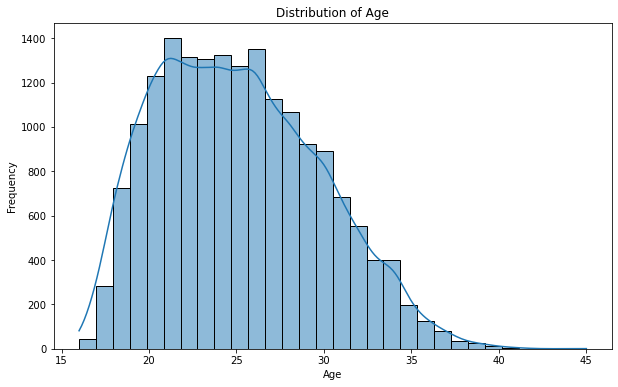

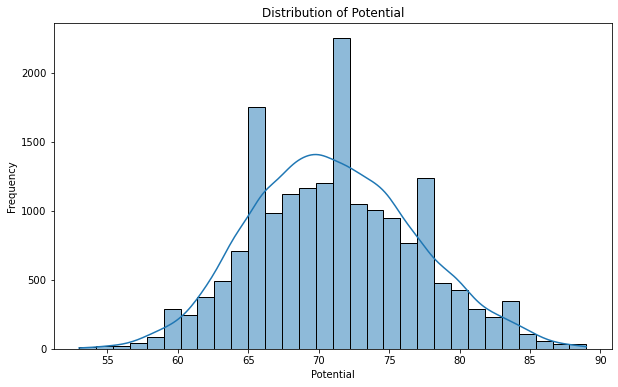

In [34]:
# Value column cleaning & casting
df['Value'] = df['Value'].replace('[\€,M,K]', '', regex=True).astype(float)

# Age distribution Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Potential distribution & Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Potential'], bins=30, kde=True)
plt.title('Distribution of Potential')
plt.xlabel('Potential')
plt.ylabel('Frequency')
plt.show()

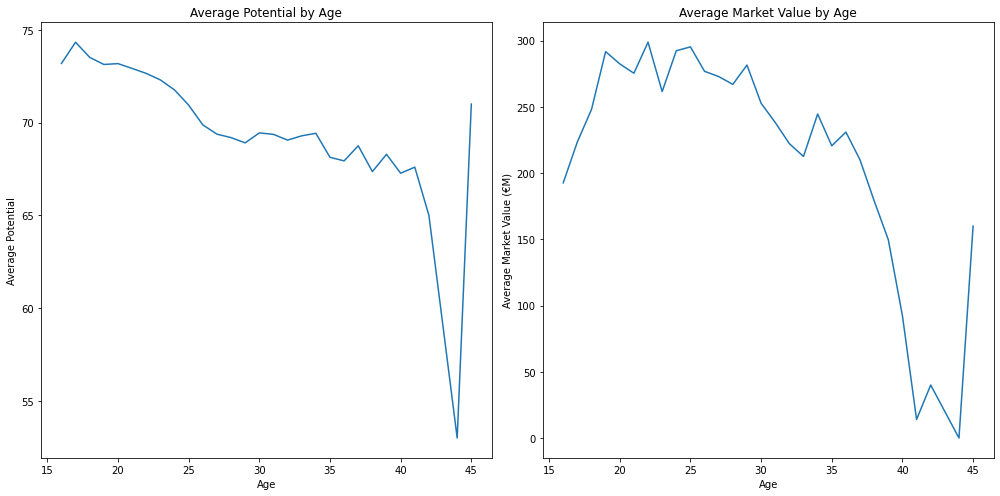

In [35]:
# Yaşa göre potansiyel puanların ortalamasını hesaplama
age_potential_avg = df.groupby('Age')['Potential'].mean().reset_index()

# Yaşa göre piyasa değerlerinin ortalamasını hesaplama
age_value_avg = df.groupby('Age')['Value'].mean().reset_index()

# Görselleştirme: Yaşa Göre Potansiyel ve Piyasa Değeri
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.lineplot(x='Age', y='Potential', data=age_potential_avg)
plt.title('Average Potential by Age')
plt.xlabel('Age')
plt.ylabel('Average Potential')

plt.subplot(1, 2, 2)
sns.lineplot(x='Age', y='Value', data=age_value_avg)
plt.title('Average Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Market Value (€M)')

plt.tight_layout()
plt.show()

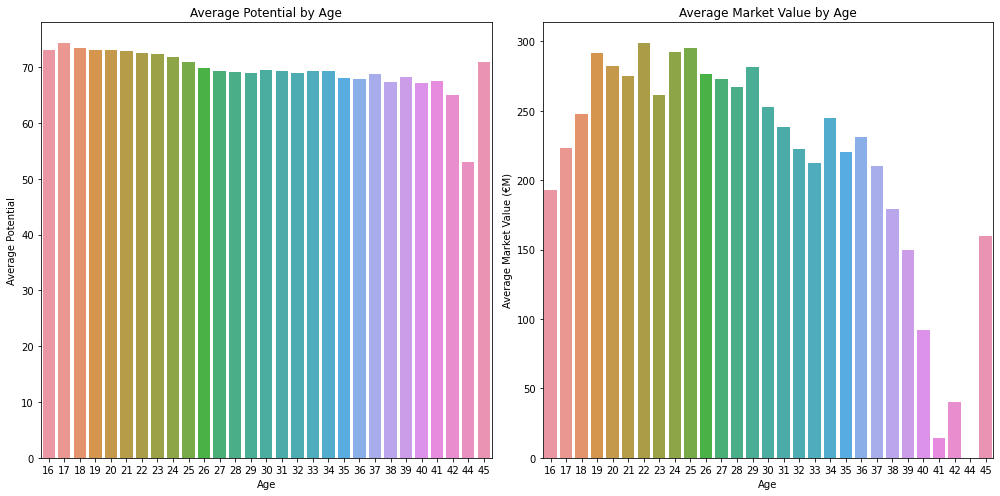

In [17]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Age', y='Potential', data=age_potential_avg)
plt.title('Average Potential by Age')
plt.xlabel('Age')
plt.ylabel('Average Potential')

plt.subplot(1, 2, 2)
sns.barplot(x='Age', y='Value', data=age_value_avg)
plt.title('Average Market Value by Age')
plt.xlabel('Age')
plt.ylabel('Average Market Value (€M)')

plt.tight_layout()
plt.show()a

<h4>Grafiklerin Anlamı ve Yorumu</h4>

Average Potential by Age

Grafik Açıklaması: 
    Bu grafik, oyuncuların yaşları arttıkça ortalama potansiyel puanlarının nasıl değiştiğini gösteriyor.
Çizgi Anlamı: 
    Çizgi, her yaş grubunun ortalama potansiyelini temsil ediyor. Yaş arttıkça çizginin düşüş göstermesi, genel olarak oyuncuların potansiyel puanlarının yaşla birlikte azaldığını gösterir.
Özellikler: 
    Grafikte, genç oyuncular arasında potansiyel puanların yüksek olduğunu ve yaş ilerledikçe bu puanların düştüğünü görebiliriz. Ancak, yaşın sonlarına doğru bir düşüş ve ardından keskin bir yükseliş gözlemleniyor ki bu, veri setindeki belirli yaş gruplarına ait veri sayısının düşük olabileceğini veya anormal değerler içerebileceğini işaret edebilir.
    
Average Market Value by Age

Grafik Açıklaması: 
    Bu grafik, oyuncuların yaşlarına göre ortalama piyasa değerlerini gösteriyor.
Çizgi Anlamı: 
    Çizgi, yaşa bağlı olarak oyuncuların ortalama piyasa değerlerini temsil eder. Grafik genel olarak yüksek yaşlara doğru bir düşüş trendi gösteriyor.
Özellikler: 
    Çizginin genel eğilimi, oyuncuların yaşları arttıkça piyasa değerlerinin düştüğünü gösterir. Ancak, yaş ilerledikçe piyasa değerinin keskin bir şekilde düştüğü ve sonra tekrar yükseldiği noktalar var. Bu durum, belirli oyuncuların veya pozisyonların piyasa değerlerindeki olağandışı dalgalanmaları yansıtabilir veya veri setindeki örneklem azlığından kaynaklanabilir.

<p id="market_value">Forwards usually have higher market values than players in other positions</p>

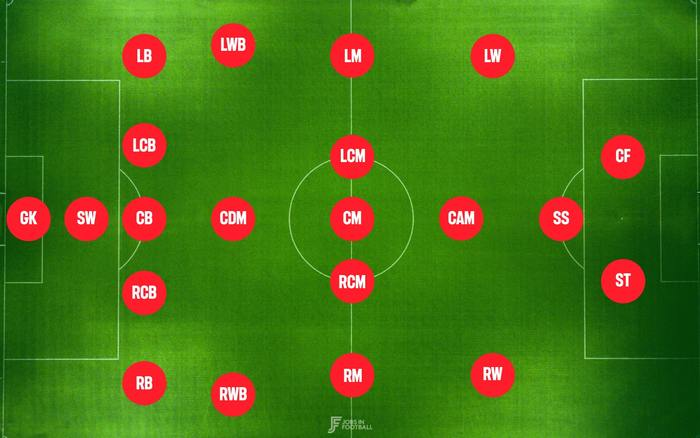

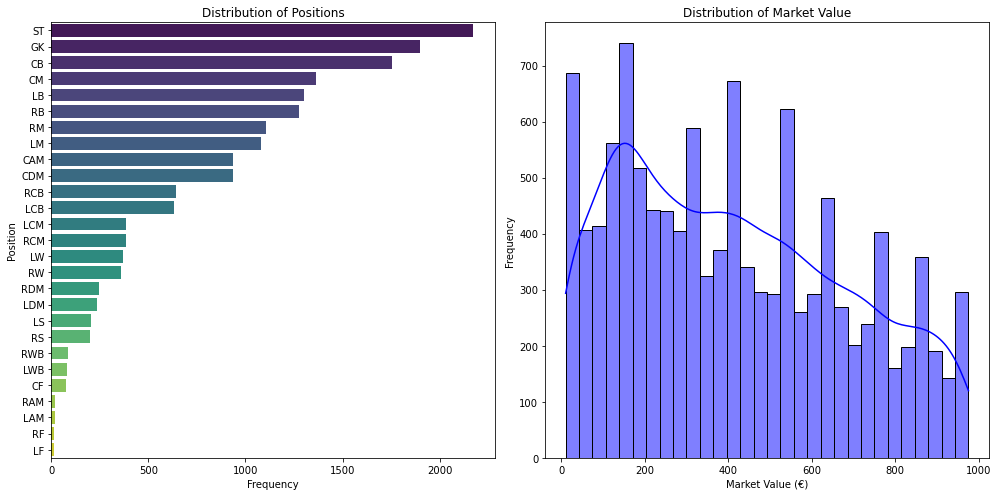

In [53]:
# Position sütununun dağılımını görselleştirme
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.countplot(y='Position', data=df, order = df['Position'].value_counts().index, palette='viridis')
plt.title('Distribution of Positions')
plt.xlabel('Frequency')
plt.ylabel('Position')

# Value sütununun dağılımını görselleştirme
plt.subplot(1, 2, 2)
sns.histplot(df[df['Value'] > 10]['Value'], bins=30, kde=True, color='blue')
plt.title('Distribution of Market Value')
plt.xlabel('Market Value (€)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

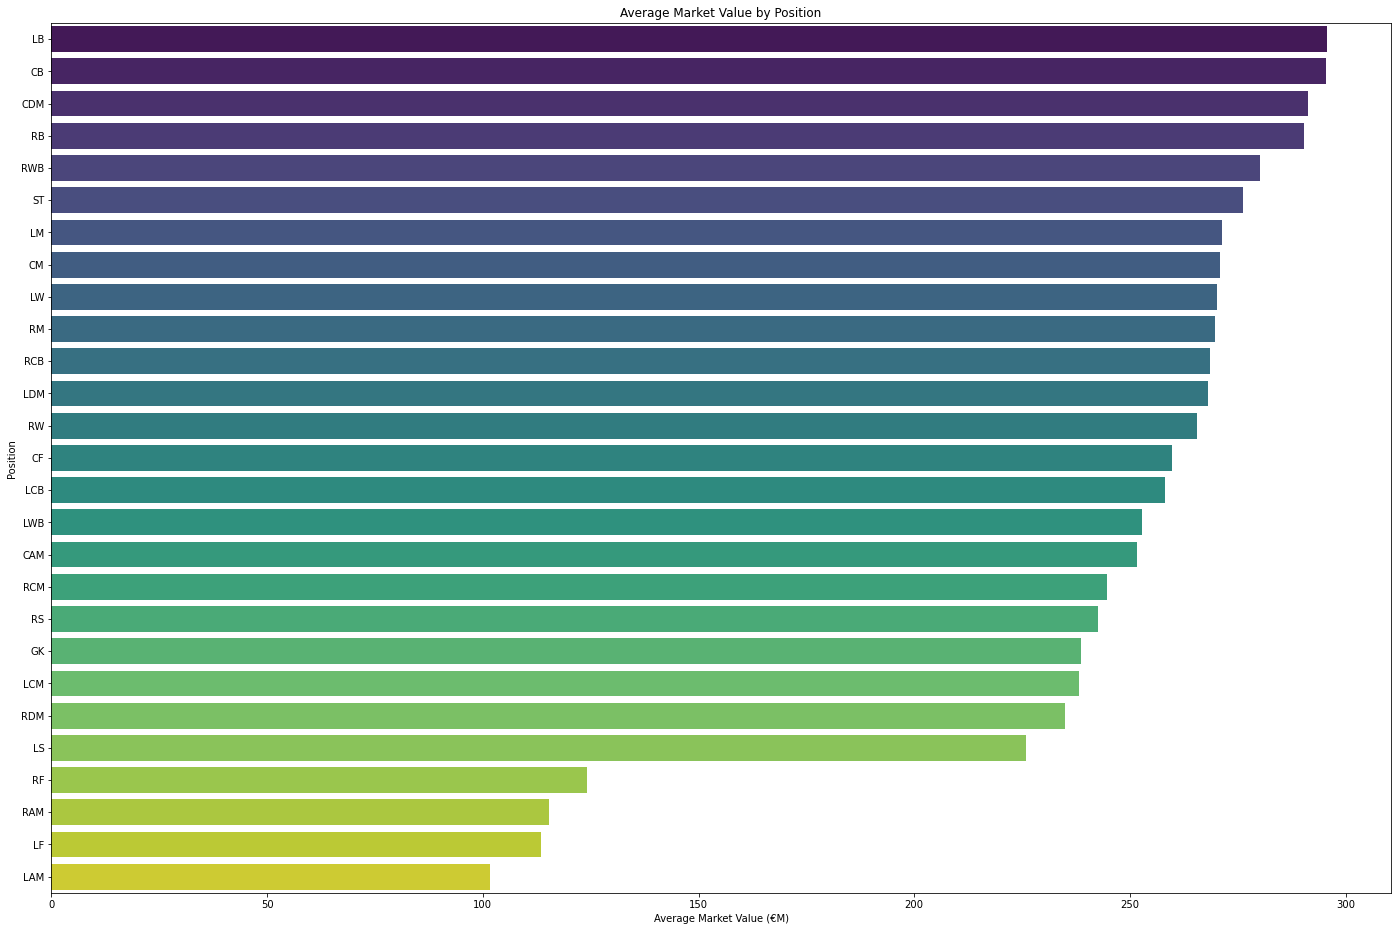

In [36]:
# Grouping as Positions and Avg. Value
position_value_avg = df.groupby('Position')['Value'].mean().sort_values(ascending=False).reset_index()

# Görselleştirme
plt.figure(figsize=(24, 16))
sns.barplot(x='Value', y='Position', data=position_value_avg, palette='viridis')
plt.title('Average Market Value by Position')
plt.xlabel('Average Market Value (€M)')
plt.ylabel('Position')
plt.show()

Yüksek Piyasa Değerine Sahip Pozisyonlar: Grafikte en üst sıralarda yer alan LB (Sol Bek), CB (Merkez Bek) ve CDM (Defansif Orta Saha) gibi pozisyonlar en yüksek ortalama piyasa değerlerine sahip. Bu, defansif rollerin piyasa değerinin yüksek olduğunu gösteriyor.

Orta Düzey Piyasa Değerine Sahip Pozisyonlar: Orta sıralarda ST (Forvet), LM (Sol Kanat) gibi pozisyonlar yer alıyor. Bu pozisyonlar hala yüksek değerlere sahipken, en üst sıradakilere kıyasla daha düşük bir ortalama piyasa değeri gösteriyor.

Düşük Piyasa Değerine Sahip Pozisyonlar: Grafikte en altta RF (Sağ Forvet), LF (Sol Forvet) gibi nadir görülen pozisyonlar düşük ortalama piyasa değerlerine sahip. Bu pozisyonlar daha az talep gördüğü veya daha az oyuncunun bu pozisyonlarda oynadığı için düşük piyasa değerlerine sahip olabilir.

<p id="dribbling_and_finishing">Players with better dribbling and finishing skills have higher values</p>

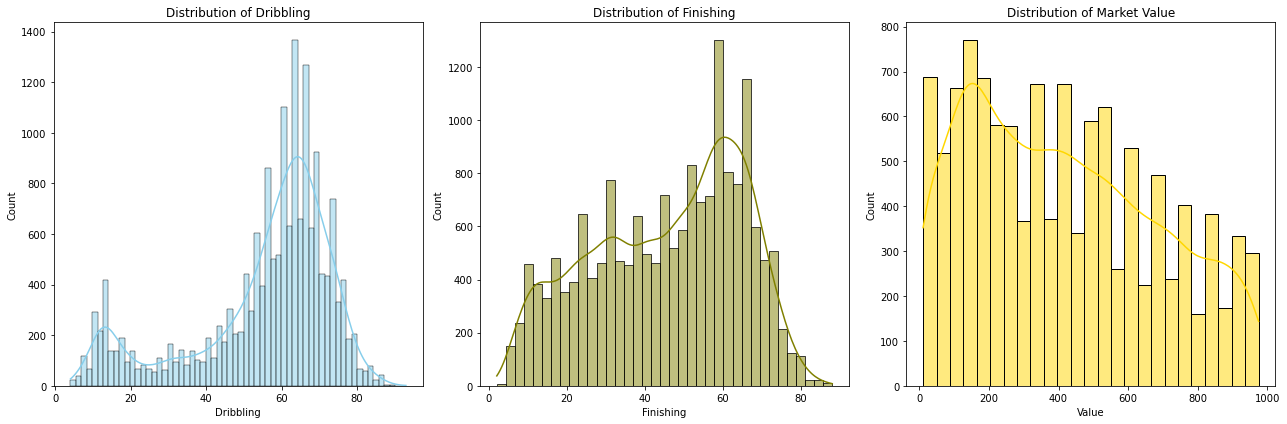

In [56]:
# Dağılım grafikleri
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Dribbling'], kde=True, color='skyblue')
plt.title('Distribution of Dribbling')

plt.subplot(1, 3, 2)
sns.histplot(df['Finishing'], kde=True, color='olive')
plt.title('Distribution of Finishing')

plt.subplot(1, 3, 3)
sns.histplot(df[df['Value'] > 10]['Value'], kde=True, color='gold')
plt.title('Distribution of Market Value')

plt.tight_layout()
plt.show()

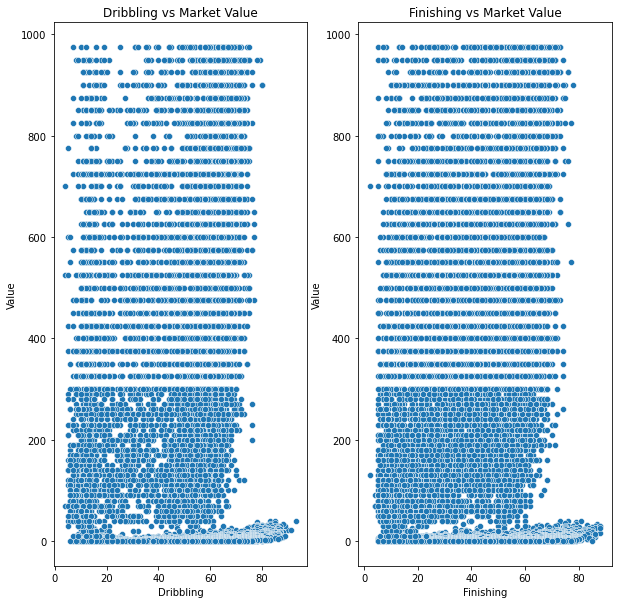

In [71]:
# İlişki analizi saçılım grafikleri
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Dribbling', y='Value', data=df)
plt.title('Dribbling vs Market Value')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Finishing', y='Value', data=df)
plt.title('Finishing vs Market Value')
plt.show()

<p id="composure">Players with higher composure scores usually have higher salaries</p>

Korelasyon Matrisi:
            Composure      Wage
Composure   1.000000  0.485744
Wage        0.485744  1.000000


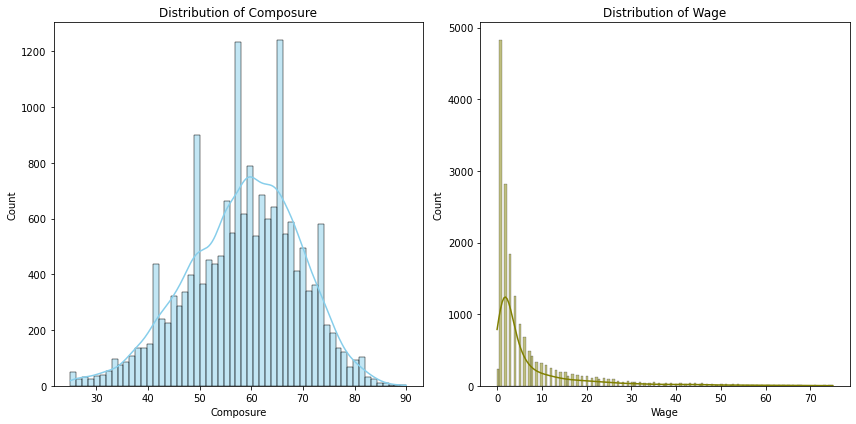

In [63]:
# Korelasyon matrisi
correlation_matrix = df[['Composure', 'Wage']].corr()
print("Korelasyon Matrisi:\n", correlation_matrix)

# Dağılım grafikleri
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Composure'], kde=True, color='skyblue')
plt.title('Distribution of Composure')

plt.subplot(1, 2, 2)
sns.histplot(df['Wage'], kde=True, color='olive')
plt.title('Distribution of Wage')

plt.tight_layout()
plt.show()

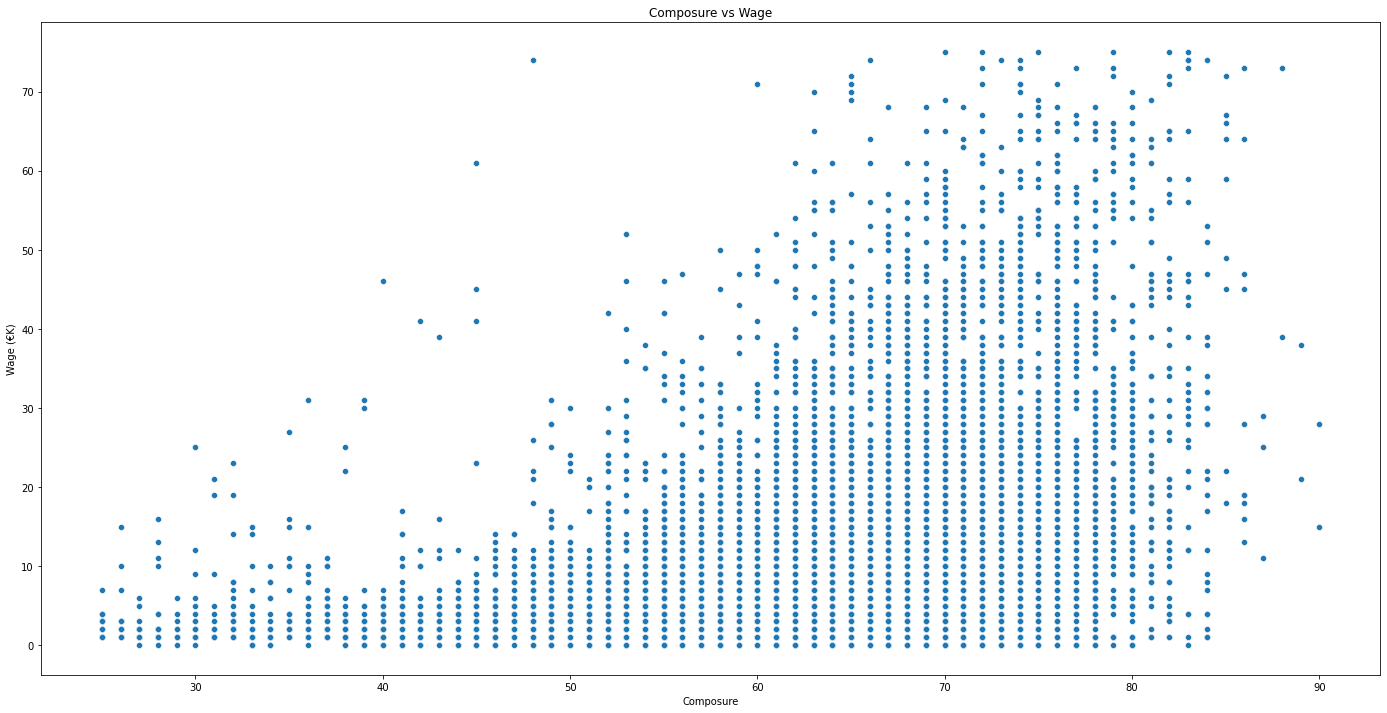

In [68]:
# İlişki analizi saçılım grafikleri
plt.figure(figsize=(24, 12))
sns.scatterplot(x='Composure', y='Wage', data=df)
plt.title('Composure vs Wage')
plt.xlabel('Composure')
plt.ylabel('Wage (€K)')
plt.show()

Genel Dağılım: Grafiğe bakıldığında, composure değeri arttıkça maaşlarda da genel bir artış trendi görülebilir, ancak bu ilişki çok güçlü değildir. Çok yüksek composure puanlarına sahip oyuncular arasında maaşlar geniş bir aralıkta dağılmıştır, bu da diğer faktörlerin de maaşı etkileyebileceğini gösterir.

Yoğunluk ve Dağılım: Composure puanları 50-70 arasında yoğunlaşmışken, bu aralıktaki maaşlar 0-30K Euro arasında değişmektedir. Daha yüksek composure puanlarına sahip oyuncuların maaşları da geniş bir aralıkta, yani daha yüksek maaşlara sahip olma eğiliminde görünmektedir.

Aykırı Değerler: Grafiğin üst kısmında, özellikle yüksek composure puanlarına sahip bazı oyuncuların çok yüksek maaşlara sahip olduğunu görebiliriz. Bunlar, genellikle yıldız oyuncular veya takımlarının kilit oyuncuları olabilir.

İlişkinin Gücü: Composure ve maaş arasındaki ilişki doğrusal değildir ve çok fazla saçılma olduğu için, bu iki özellik arasında güçlü bir doğrusal ilişki olduğunu söylemek zordur. Bu, composure'un maaşı belirlemede bir faktör olabileceğini ancak tek başına belirleyici olmadığını gösterir.